In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, root_mean_squared_error, r2_score
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
# Cargar el dataset
data = pd.read_csv('train.csv')

# Variable resultado
X = data.drop(['Id', 'SalePrice'], axis=1)
y = data['SalePrice']

# Convertir variables categóricas a numéricas
X = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un imputador que reemplaza los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Aplicar el imputador a X
X = imputer.fit_transform(X)

# Aplicar el imputador al conjunto de entrenamiento
X_train = imputer.fit_transform(X_train)

# Aplicar el imputador al conjunto de prueba
X_test = imputer.transform(X_test)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo de regresión KNN

MSE: 1862721893.529775
R²: 0.7571521936336427


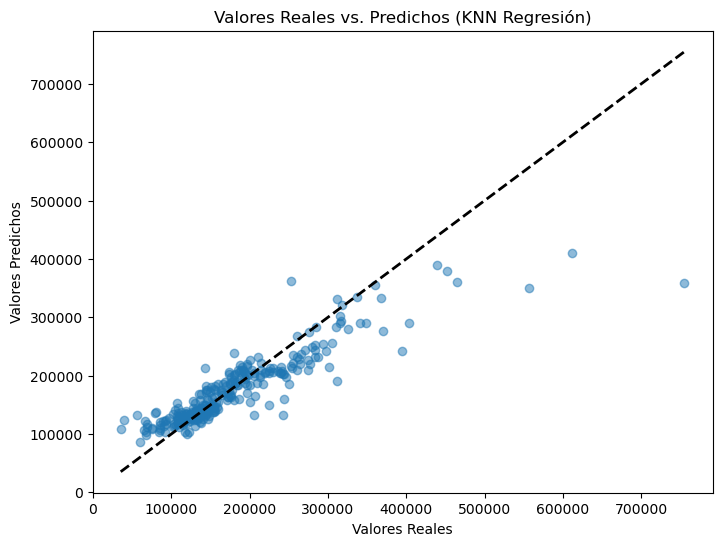

In [17]:
# Crear el modelo KNN
knn = KNeighborsRegressor(n_neighbors=11)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Predecir con el modelo
y_pred = knn.predict(X_test)

# Calcular MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

# Gráfica de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos (KNN Regresión)')
plt.show()

# Comparación entre modelos

               Modelo           MSE        R²
0                 KNN  1.915400e+09  0.750284
1    Regresión Lineal  1.512602e+09  0.800000
2  Árbol de Regresión  1.565821e+09  0.800000


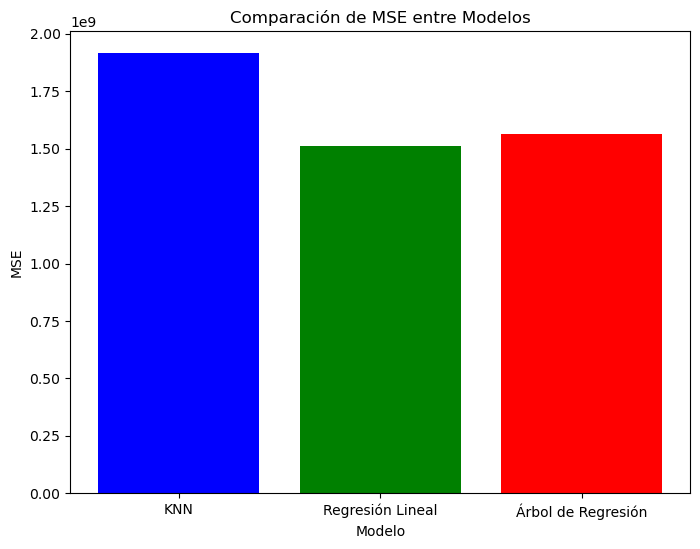

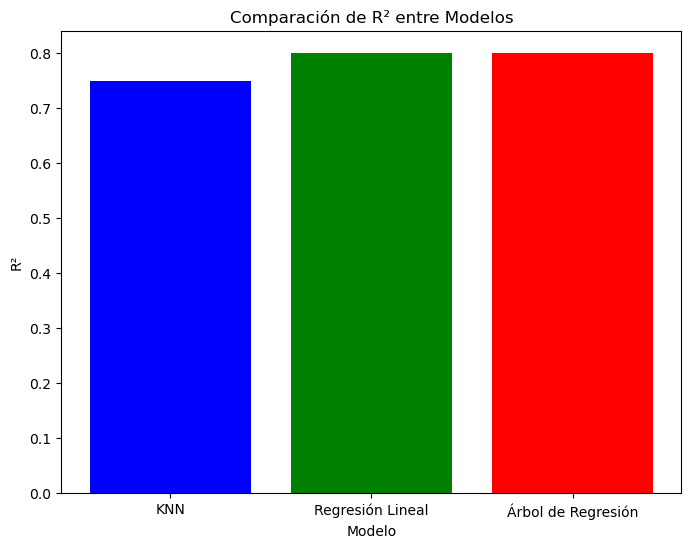

In [5]:
# Regresión lineal
LMSE = 1512601537.83
LR = 0.80

# Árbol de regresión
AMSE = 1565821438.82
AR = 0.80

# Nive Bayes
F1 = 0.89

# KNN
KNNMSE = 1915400254.9997258
KNNR = 0.7502843812294465

import pandas as pd

# Crear una tabla
results = {
    'Modelo': ['KNN', 'Regresión Lineal', 'Árbol de Regresión'],
    'MSE': [KNNMSE, LMSE, AMSE],
    'R²': [KNNR, LR, AR]
}

results_df = pd.DataFrame(results)
print(results_df)

# Gráfica de comparación de MSE
plt.figure(figsize=(8, 6))
plt.bar(results_df['Modelo'], results_df['MSE'], color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre Modelos')
plt.show()

# Gráfica de comparación de R²
plt.figure(figsize=(8, 6))
plt.bar(results_df['Modelo'], results_df['R²'], color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('R²')
plt.title('Comparación de R² entre Modelos')
plt.show()

# Modelo de clasificación

In [20]:
# Crear categorías basadas en el precio
y_cat = pd.cut(y, bins=[0, y.quantile(0.33), y.quantile(0.66), y.max()], labels=['barata', 'media', 'cara'])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Normalizar los datos
X_train_cat = scaler.fit_transform(X_train_cat)
X_test_cat = scaler.transform(X_test_cat)

# Crear y entrenar el modelo KNN para clasificación
from sklearn.neighbors import KNeighborsClassifier

knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train_cat, y_train_cat)

# Predecir con el modelo
y_pred_cat = knn_class.predict(X_test_cat)

y_cat

0        cara
1       media
2        cara
3       media
4        cara
        ...  
1455    media
1456     cara
1457     cara
1458    media
1459    media
Name: SalePrice, Length: 1460, dtype: category
Categories (3, object): ['barata' < 'media' < 'cara']

# Eficiencia

Precisión: 0.7636986301369864
Matriz de Confusión:
[[96  0 14]
 [ 4 79 12]
 [25 14 48]]
Informe de Clasificación:
              precision    recall  f1-score   support

      barata       0.77      0.87      0.82       110
        cara       0.85      0.83      0.84        95
       media       0.65      0.55      0.60        87

    accuracy                           0.76       292
   macro avg       0.76      0.75      0.75       292
weighted avg       0.76      0.76      0.76       292



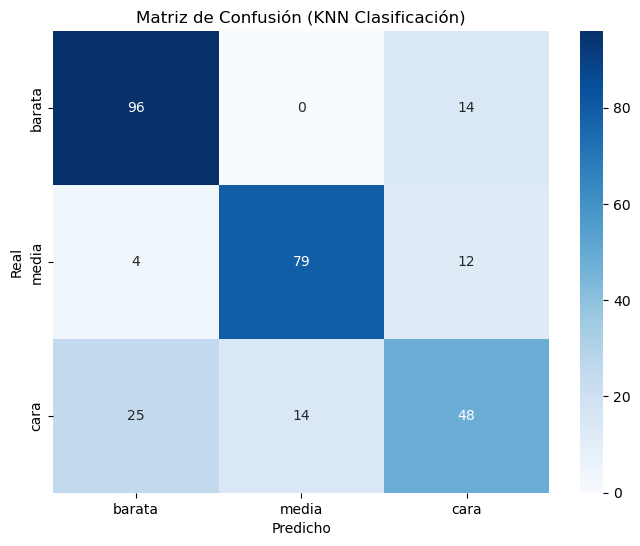

In [21]:
# Calcular precisión
accuracy = accuracy_score(y_test_cat, y_pred_cat)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)

# Informe de clasificación
class_report = classification_report(y_test_cat, y_pred_cat)

print(f'Precisión: {accuracy}')
print(f'Matriz de Confusión:\n{conf_matrix}')
print(f'Informe de Clasificación:\n{class_report}')

# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['barata', 'media', 'cara'], yticklabels=['barata', 'media', 'cara'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión (KNN Clasificación)')
plt.show()